In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt

## 1. (Perceptron) Using the make blobs function in sklearn generate a dataset of 100 points with two classes. Write the perceptron algorithm by scratch and show the intermediate hyperplanes generated. 

In [2]:
from sklearn.datasets import make_blobs

In [3]:
#generating dataset with 100 points with two different classes.

X, y = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 2) 

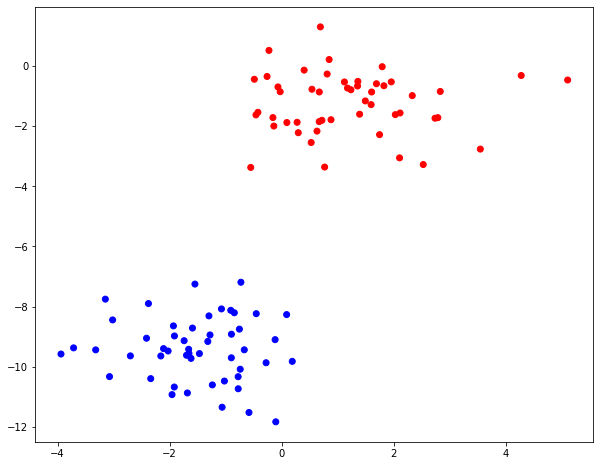

In [4]:
#initial plot for two classes

plt.figure(figsize = (10,8))
c = ['r' if i == 1  else 'b' for i in y]
plt.scatter(X[:,0], X[:,1], color = c)

In [5]:
X_aug = np.ones((100,3))
X_aug[:, 1:3] = X  #augmented matrix with bias

In [6]:
W = np.random.normal(0,1,3)  #initial weights (random)
xmin = min(X_aug[:, 1])
xmax = max(X_aug[:, 1])

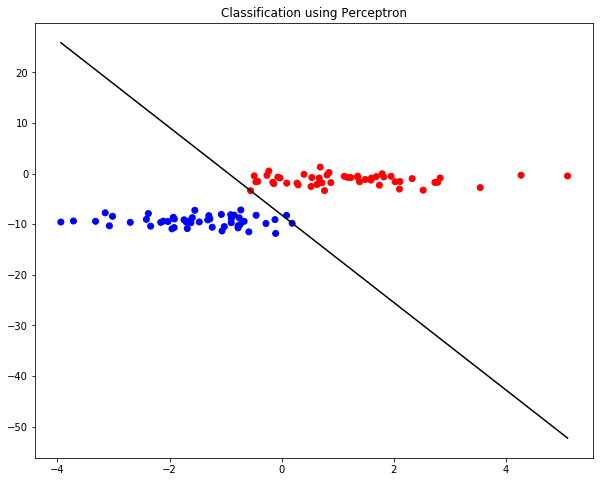

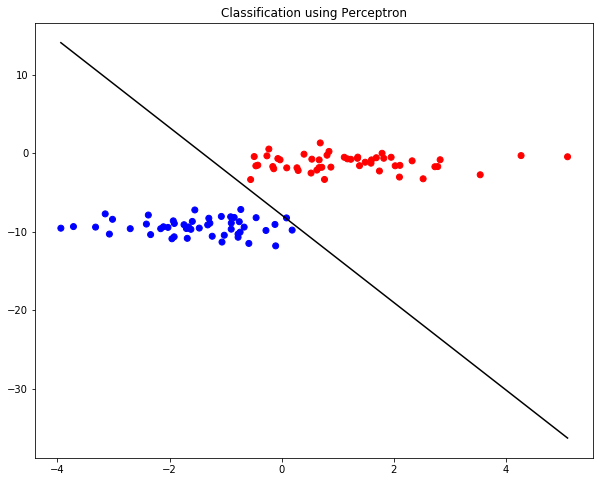

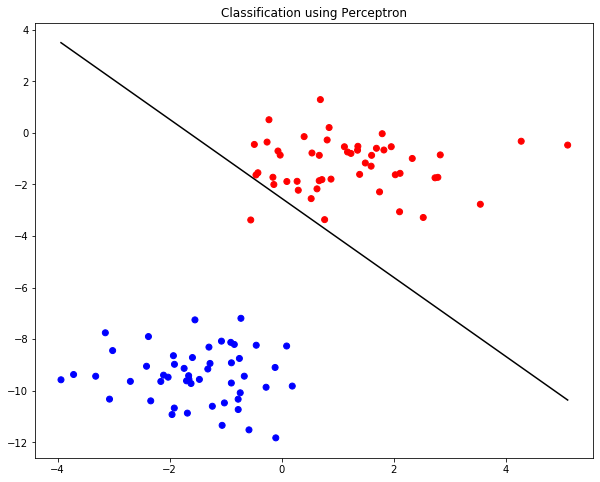

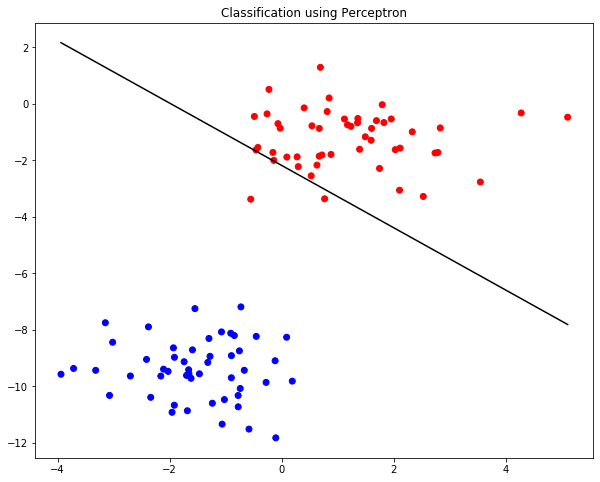

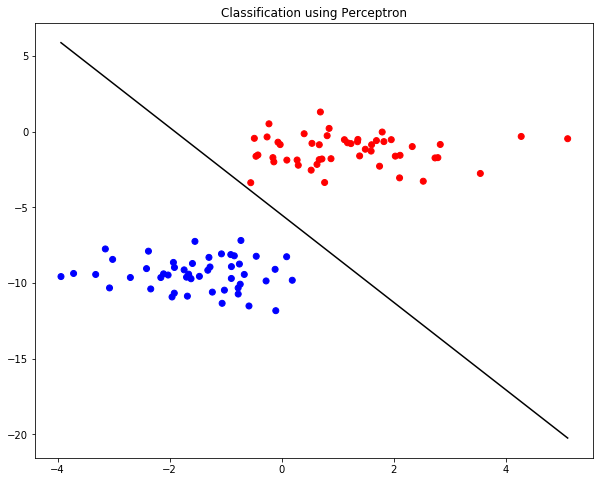

In [7]:
#perceptron algorithm:

while(True):
    for j in range(len(y)):
        temp = 0.0
        temp = np.dot(X_aug[j], W)
        if(y[j] == 1 and temp < 0):
            W = W + X_aug[j]
        elif(y[j] == 0 and temp >= 0):
            W = W - X_aug[j]
    
    #condition to stop while-loop:
    flag = 0
    for j in range(len(y)):
        temp = 0.0
        temp = np.dot(X_aug[j], W)
        if(y[j] == 1 and temp < 0):
            flag = 1
        elif(y[j] == 0 and temp >= 0):
            flag = 1
    
    xx = np.linspace(xmin,xmax)
    yy = (-W[0] - W[1]*xx) / W[2]
    
    plt.figure(figsize = (10,8))
    c = ['r' if i == 1  else 'b' for i in y]
    plt.scatter(X[:,0], X[:,1], color = c)
    plt.plot(xx, yy, color = 'black')
    plt.title('Classification using Perceptron')
    plt.show()
    if(flag == 0):
        break

### 2. (Perceptron) Repeat the above exercise with batch gradients instead. Step size might need to be adjusted for convergenence.

In [20]:
W_batch_gradient = np.random.normal(0,1,3)
epsilon = 10**(-2)

array([ 0.0971456 ,  0.86656983, -0.48994649])

3.2534336403613477
[ 0.2171456   0.8082146  -0.03360383]


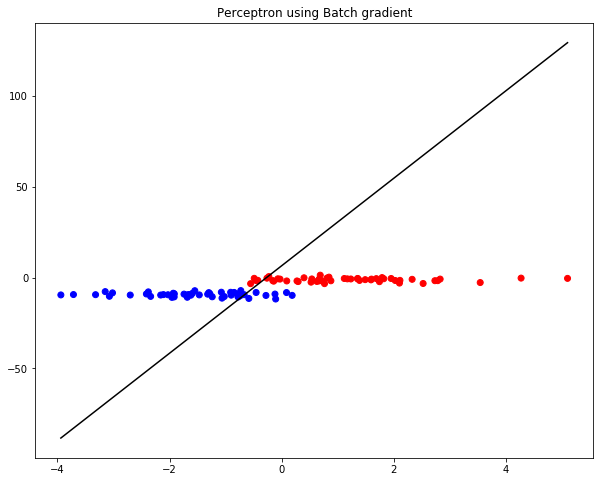

1.9060423636728192
[ 0.3371456   0.75295768 -0.00540846]


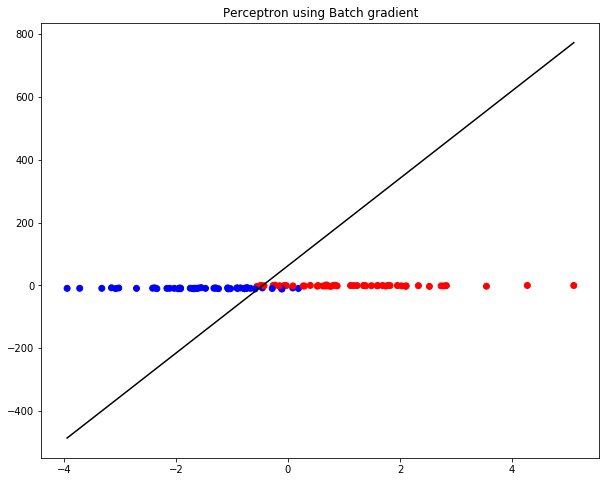

0.21206699601516277
[0.4271456  0.7104676  0.06914669]


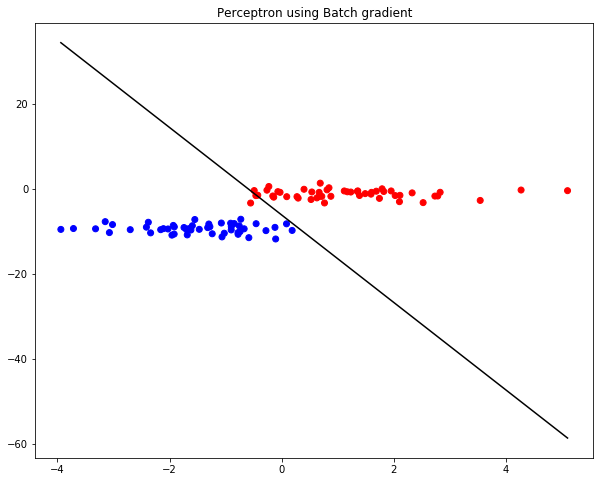

0.3543378967696936
[0.5171456  0.68545225 0.13856375]


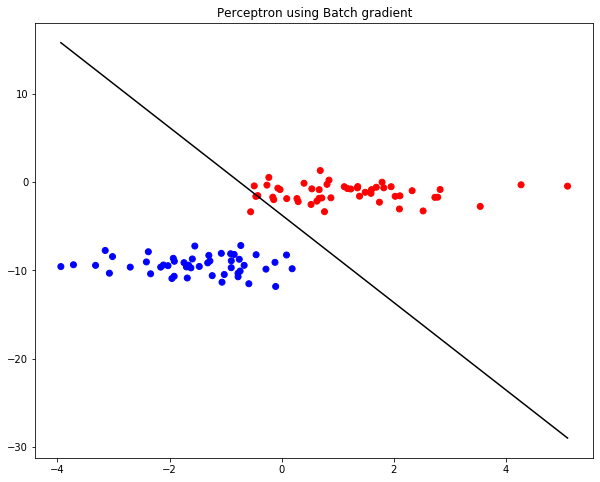

0.2987566465987987
[0.6071456  0.64110403 0.16323042]


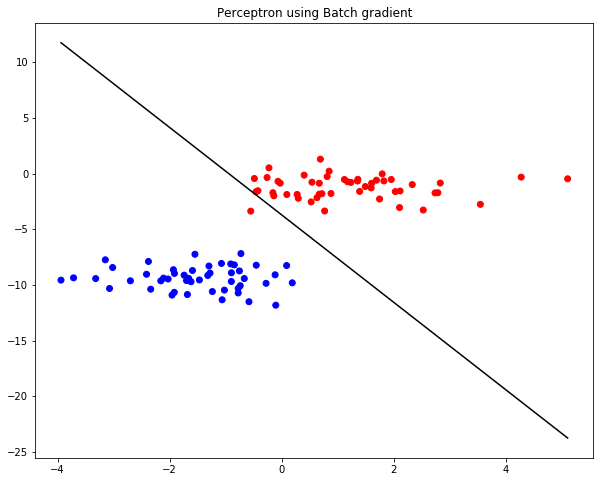

0.32584873160294925
[0.6371456  0.62450128 0.0619443 ]


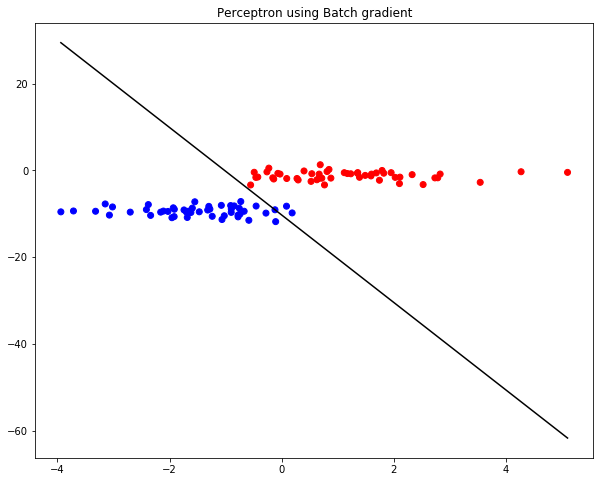

0.35478713810363605
[0.6671456  0.5884678  0.20622566]


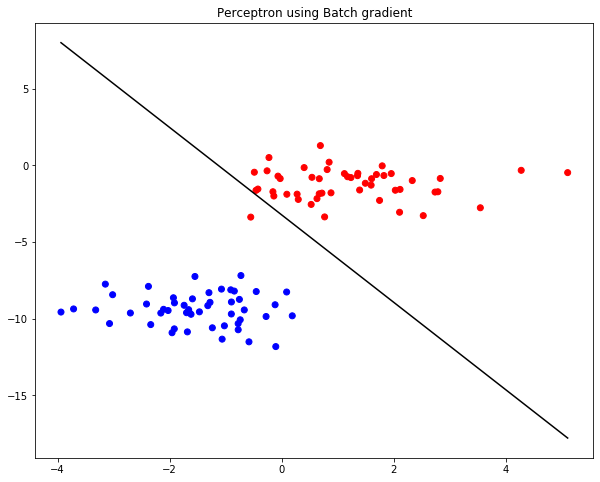

0
[0.6971456  0.57186505 0.10493954]


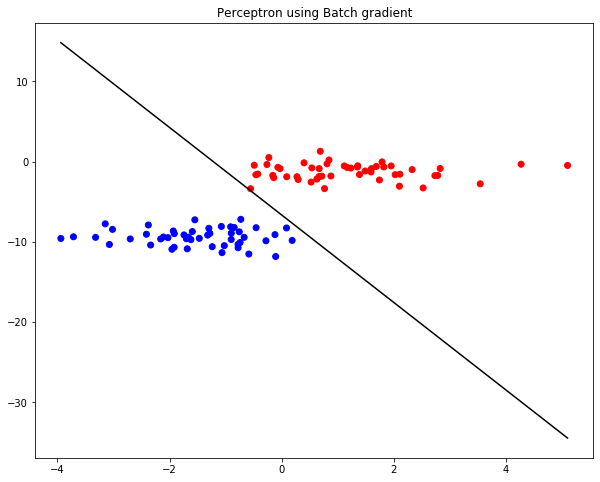

In [21]:
# Perceptron using Batch gradient:
error = 3
while(error >= epsilon):
    eta = 0.03 #step_size
    for j in range(len(y)):
        temp = 0.0
        temp = np.dot(X_aug[j], W_batch_gradient)
        if(y[j] == 1 and temp < 0):
            W_batch_gradient = W_batch_gradient + eta*X_aug[j]
        elif(y[j] == 0 and temp >= 0):
            W_batch_gradient = W_batch_gradient - eta*X_aug[j]
    
    error = 0
    for j in range(len(y)):
        temp = 0.0
        temp = np.dot(X_aug[j], W_batch_gradient)
        if(y[j] == 1 and temp < 0):
            error = error - (temp)
        elif(y[j] == 0 and temp >= 0):
            error = error + (temp)
    
    #condition to stop while-loop:
    flag = 0
    for j in range(len(y)):
        temp = 0.0
        temp = np.dot(X_aug[j], W_batch_gradient)
        if(y[j] == 1 and temp < 0):
            flag = 1
        elif(y[j] == 0 and temp >= 0):
            flag = 1
            
        
    print(error)
    print(W_batch_gradient)
    xx_batch_gradient = np.linspace(xmin,xmax)
    yy_batch_gradient = (-W_batch_gradient[0] - W_batch_gradient[1]*xx_batch_gradient) / W_batch_gradient[2]
    
    plt.figure(figsize = (10,8))
    c = ['r' if i == 1  else 'b' for i in y]
    plt.scatter(X[:,0], X[:,1], color = c)
    plt.plot(xx_batch_gradient, yy_batch_gradient, color = 'black')
    plt.title('Perceptron using Batch gradient')
    plt.show()
    if(flag == 0):
        break

## 3. (Perceptron) Using the make circles function in sklearn generate two classes so that they form different concentratic circles. Generate 100 points. Create second order features and train the perceptron. Using the contour function show the final decision boundary in the original two dimensional space. 

In [79]:
from sklearn.datasets import make_circles

In [80]:
X_circle, y_circle = make_circles(n_samples = 100, random_state = 2, factor = 0.7)

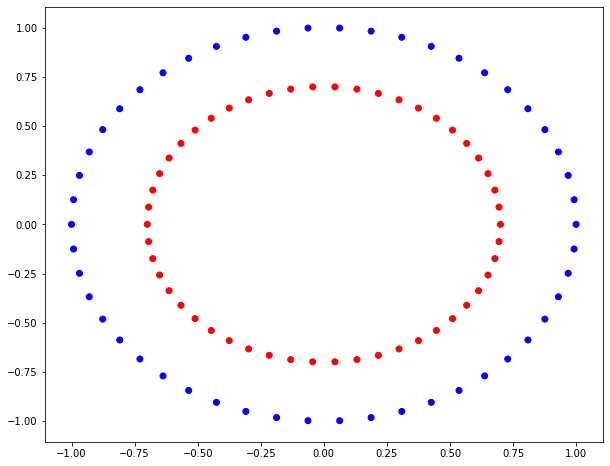

In [81]:
#initial plot for two classes

plt.figure(figsize = (10,8))
c = ['r' if i == 1  else 'b' for i in y_circle]
plt.scatter(X_circle[:,0], X_circle[:,1], color = c)

In [106]:
# Creating second order features:

data = np.ones((len(y_circle), 6))

In [107]:
data[:, 1:3] = X_circle

In [108]:
data[:,3] = X_circle[:,0]**2
data[:,4] = X_circle[:,1]**2
data[:,5] = X_circle[:,0]*X_circle[:,1]

In [109]:
W_nlsp = np.random.normal(0,1,6)  #initial weights (random)
error_nlsp = 1
eps = 10**(-2)

In [110]:
#perceptron algorithm for non-linearly sepearble data:

while(error_nlsp >= eps):
    eta = 0.03 #step_size
    for j in range(len(y_circle)):
        temp = 0.0
        temp = np.dot(data[j], W_nlsp)
        if(y_circle[j] == 1 and temp < 0):
            W_nlsp = W_nlsp + eta*data[j]
        elif(y_circle[j] == 0 and temp >= 0):
            W_nlsp = W_nlsp - eta*data[j]
    
    error_nlsp = 0
    for j in range(len(y_circle)):
        temp = 0.0
        temp = np.dot(data[j], W_nlsp)
        if(y_circle[j] == 1 and temp < 0):
            error_nlsp = error_nlsp - (temp)
        elif(y_circle[j] == 0 and temp >= 0):
            error_nlsp = error_nlsp + (temp)
    
    #condition to stop while-loop:
    flag = 0
    for j in range(len(y_circle)):
        temp = 0.0
        temp = np.dot(data[j], W_nlsp)
        if(y_circle[j] == 1 and temp < 0):
            flag = 1
        elif(y_circle[j] == 0 and temp >= 0):
            flag = 1
    print(error_nlsp)
    

22.111645217939056
10.365483572271625
3.0130380369282515
0.1124895939215786
0


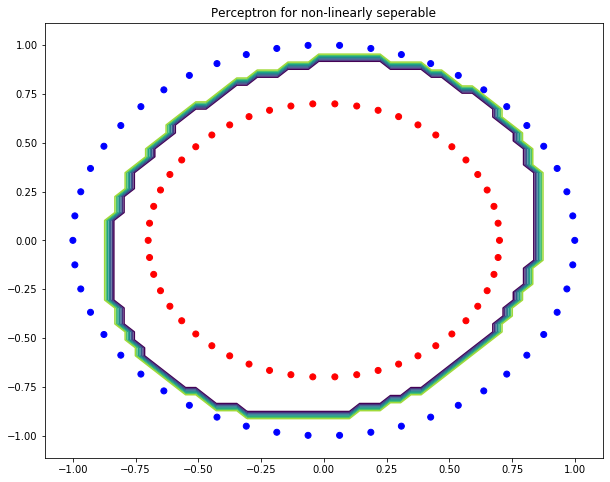

In [111]:
def J(x, y):
    t = -(W_nlsp[0] + W_nlsp[1]*x + W_nlsp[2]*y + W_nlsp[3]*(x)**2 + W_nlsp[4]*(y)**2 + W_nlsp[5]*(x*y))
    return(t >= 0)

xmin = min(data[:, 1])
xmax = max(data[:, 1])
ymin = min(data[:, 2])
ymax = max(data[:, 2])    
xx = np.linspace(xmin,xmax)
yy = np.linspace(ymin, ymax)
P, Q = np.meshgrid(xx, yy)
zz = J(P, Q)
    
plt.figure(figsize = (10,8))
plt.contour(xx, yy, zz)
c = ['r' if i == 1  else 'b' for i in y_circle]
plt.scatter(X_circle[:,0], X_circle[:,1], color = c)
plt.title('Perceptron for non-linearly seperable')
plt.show()

## 4. (Perceptron) Repeat the two perceptron example above (make blobs and make circles) generating 1000 points. We are not interested to see the plots now. We instead want to split the dataset into test (50%) and train(50%). Report the test accuracy of perceptron in each case. 

In [124]:
#generating dataset with 1000 points with two different classes.

mb, y_4 = make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 2)

In [125]:
X_4 = np.ones((1000,3))
X_4[:, 1:3] = mb  #augmented matrix with bias
X_4_train = X_4[:500,:]
X_4_test = X_4[500:,:]
y_4_train = y_4[:500]
y_4_test = y_4[500:]

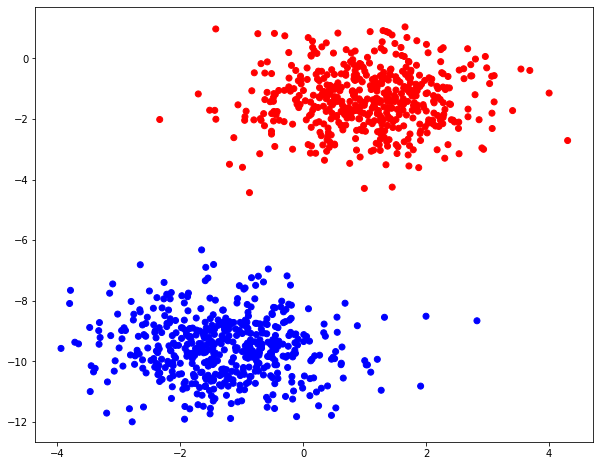

In [128]:
#initial plot for two classes

plt.figure(figsize = (10,8))
c = ['r' if i == 1  else 'b' for i in y_4]
plt.scatter(mb[:,0], mb[:,1], color = c)

In [140]:
W_4_train = np.random.normal(0,1,3)
W_4_train

array([-1.25275083,  0.62857382,  0.32795775])

27.90416640319539
[0.27724917 0.5958287  0.32308549]


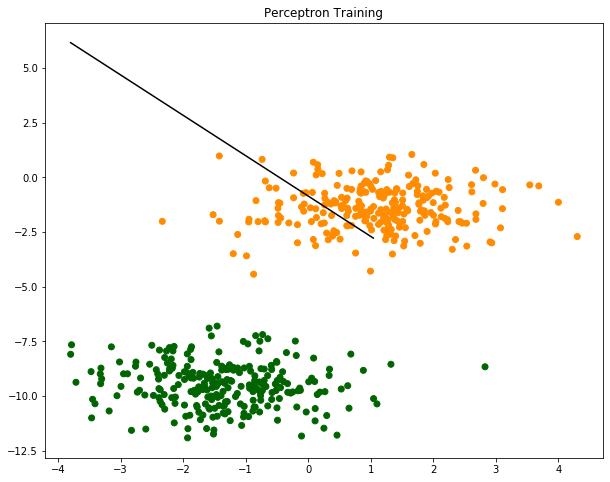

1.3326758640308132
[0.72724917 0.2520721  0.20333318]


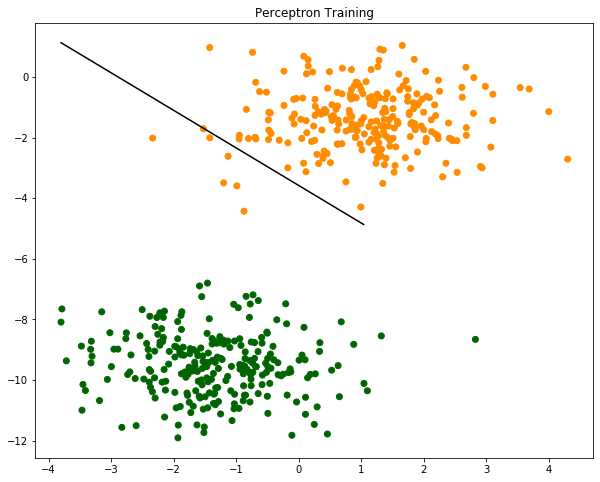

0
[0.81724917 0.07973263 0.14228689]


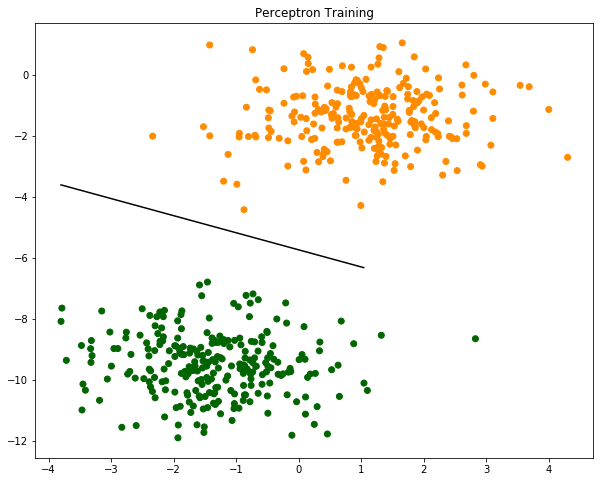

In [141]:
#training:

# Perceptron using Batch gradient:
error = 3
while(error >= epsilon):
    eta = 0.03 #step_size
    for j in range(len(y_4_train)):
        temp = 0.0
        temp = np.dot(X_4_train[j], W_4_train)
        if(y_4_train[j] == 1 and temp < 0):
            W_4_train = W_4_train + eta*X_4_train[j]
        elif(y_4_train[j] == 0 and temp >= 0):
            W_4_train = W_4_train - eta*X_4_train[j]
    
    error = 0
    for j in range(len(y_4_train)):
        temp = 0.0
        temp = np.dot(X_4_train[j], W_4_train)
        if(y_4_train[j] == 1 and temp < 0):
            error = error - (temp)
        elif(y_4_train[j] == 0 and temp >= 0):
            error = error + (temp)
    
    #condition to stop while-loop:
    flag = 0
    for j in range(len(y_4_train)):
        temp = 0.0
        temp = np.dot(X_4_train[j], W_4_train)
        if(y_4_train[j] == 1 and temp < 0):
            flag = 1
        elif(y_4_train[j] == 0 and temp >= 0):
            flag = 1
            
        
    print(error)
    print(W_4_train)
    xmin_4 = min(X_4_train[:,1])
    xmax_4 = max(X_4_train[:,2])
    xx_4_train = np.linspace(xmin_4,xmax_4)
    yy_4_train = (-W_4_train[0] - W_4_train[1]*xx_4_train) / W_4_train[2]
    
    #train-
    plt.figure(figsize = (10,8))
    c = ['darkorange' if i == 1  else 'darkgreen' for i in y_4_train]
    plt.scatter(X_4_train[:,1], X_4_train[:,2], color = c)
    plt.plot(xx_4_train, yy_4_train, color = 'black')
    plt.title('Perceptron Training')
    plt.show()
    if(flag == 0):
        break

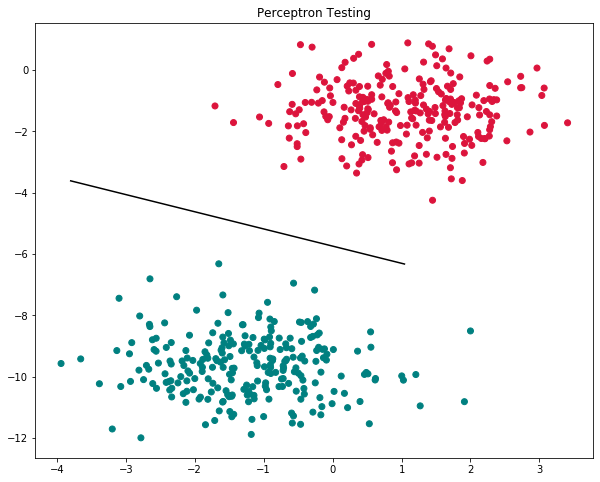

In [143]:
#testing:

plt.figure(figsize = (10,8))
c = ['crimson' if i == 1  else 'teal' for i in y_4_test]
plt.scatter(X_4_test[:,1], X_4_test[:,2], color = c)
plt.plot(xx_4_train, yy_4_train, color = 'black') #trained hyperplane
plt.title('Perceptron Testing')
plt.show()

__From the plot, we can see that testing accuracy is 100%.(as each point is coreectly labeled)__

In [144]:
X_circle_4, y_circle_4 = make_circles(n_samples = 1000, random_state = 2, factor = 0.7)

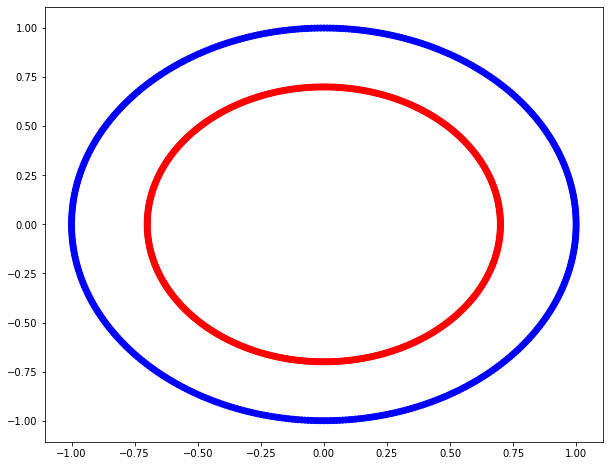

In [145]:
#initial plot for two classes

plt.figure(figsize = (10,8))
c = ['r' if i == 1  else 'b' for i in y_circle_4]
plt.scatter(X_circle_4[:,0], X_circle_4[:,1], color = c)

In [153]:
# Creating second order features:

data_4 = np.ones((len(y_circle_4), 6))

In [154]:
data_4[:, 1:3] = X_circle_4

In [155]:
data_4[:,3] = X_circle_4[:,0]**2
data_4[:,4] = X_circle_4[:,1]**2
data_4[:,5] = X_circle_4[:,0]*X_circle_4[:,1]

In [156]:
data_4_train = data_4[:500,:]
data_4_test = data_4[500:,:]
y_circle_4_train = y_circle_4[:500]
y_circle_4_test = y_circle_4[500:]

In [167]:
W_nlsp_4 = np.random.normal(0,1,6)  #initial weights (random)
error_nlsp_4 = 3
eps_4 = 10**(-2)

In [168]:
#perceptron algorithm training for non-linearly sepearble data:

while(error_nlsp_4 >= eps_4):
    eta = 0.03 #step_size
    for j in range(len(y_circle_4_train)):
        temp = 0.0
        temp = np.dot(data_4_train[j], W_nlsp_4)
        if(y_circle_4_train[j] == 1 and temp < 0):
            W_nlsp_4 = W_nlsp_4 + eta*data_4_train[j]
        elif(y_circle_4_train[j] == 0 and temp >= 0):
            W_nlsp_4 = W_nlsp_4 - eta*data_4_train[j]
    
    error_nlsp_4 = 0
    for j in range(len(y_circle_4_train)):
        temp = 0.0
        temp = np.dot(data_4_train[j], W_nlsp_4)
        if(y_circle_4_train[j] == 1 and temp < 0):
            error_nlsp_4 = error_nlsp_4 - (temp)
        elif(y_circle_4_train[j] == 0 and temp >= 0):
            error_nlsp_4 = error_nlsp_4 + (temp)
    
    #condition to stop while-loop:
    flag = 0
    for j in range(len(y_circle_4_train)):
        temp = 0.0
        temp = np.dot(data_4_train[j], W_nlsp_4)
        if(y_circle_4_train[j] == 1 and temp < 0):
            flag = 1
        elif(y_circle_4_train[j] == 0 and temp >= 0):
            flag = 1
    print(error_nlsp_4)
    

10.92404033893237
0


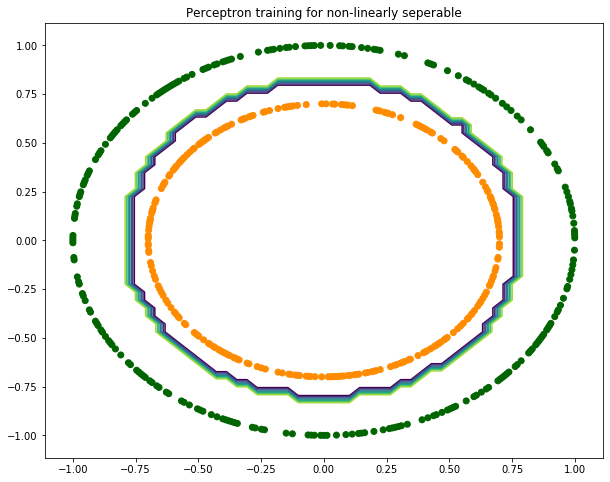

In [169]:
def J(x, y):
    t = -(W_nlsp_4[0] + W_nlsp_4[1]*x + W_nlsp_4[2]*y + W_nlsp_4[3]*(x)**2 + W_nlsp_4[4]*(y)**2 + W_nlsp_4[5]*(x*y))
    return(t >= 0)

xmin_4 = min(data_4_train[:, 1])
xmax_4 = max(data_4_train[:, 1])
ymin_4 = min(data_4_train[:, 2])
ymax_4 = max(data_4_train[:, 2])    
xx_4 = np.linspace(xmin_4,xmax_4)
yy_4 = np.linspace(ymin_4, ymax_4)
P_4, Q_4 = np.meshgrid(xx_4, yy_4)
zz_4 = J(P_4, Q_4)
    
plt.figure(figsize = (10,8))
plt.contour(xx_4, yy_4, zz_4)
c = ['darkorange' if i == 1  else 'darkgreen' for i in y_circle_4_train]
plt.scatter(X_circle_4[:500,0], X_circle_4[:500,1], color = c)
plt.title('Perceptron training for non-linearly seperable')
plt.show()

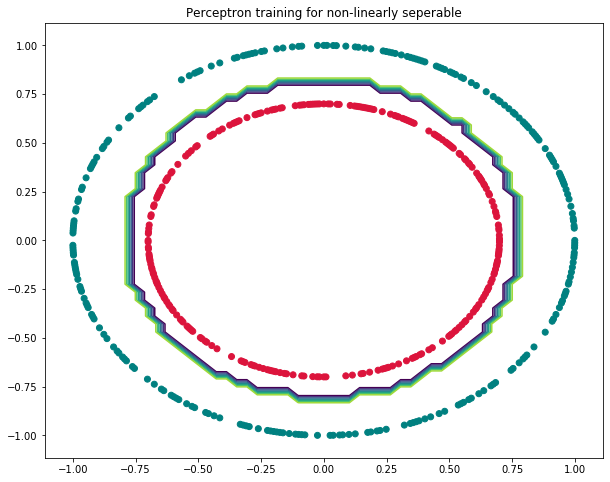

In [172]:
#testing:

plt.figure(figsize = (10,8))
plt.contour(xx_4, yy_4, zz_4) #trained contour
c = ['crimson' if i == 1  else 'teal' for i in y_circle_4_test]
plt.scatter(X_circle_4[500:,0], X_circle_4[500:,1], color = c)
plt.title('Perceptron training for non-linearly seperable')
plt.show()

__We can see that her also, our testing accuracy is 100% (as contour seperates the two circles)__